## This script is to find the relevant node's connection in the IronMarch HackForum. 

Finally, this script will generate a knowledge graph of the data, wherein the nodes represesnt the author, and the edge value represent different topics of disscusion.

In [ ]:
from google.colab import drive
drive.mount('/jash')

Mounted at /jash


In [ ]:
import pandas as pd

In [ ]:
df_topics = pd.read_csv('/jash/My Drive/Dark web analysis project/orig_topics.csv',sep = ';')
df_posts = pd.read_csv('/jash/My Drive/Dark web analysis project/orig_posts.csv',sep = ';')
print(df_topics.head())
print('\n\n\n', df_posts.head())

    tid  ... topic_answered_pid
0  5182  ...                  0
1     3  ...                  0
2  3674  ...                  0
3     7  ...                  0
4     8  ...                  0

[5 rows x 36 columns]



       pid  append_edit  ...  post_field_t1  post_field_t2
0     202            0  ...            NaN            NaN
1     203            0  ...            NaN            NaN
2     532            0  ...            NaN            NaN
3  114067            0  ...            NaN            NaN
4  114068            0  ...            NaN            NaN

[5 rows x 24 columns]


In [ ]:
print(df_topics.columns.values)

['tid' 'title' 'description' 'state' 'posts' 'starter_id' 'start_date'
 'last_poster_id' 'last_post' 'icon_id' 'starter_name' 'last_poster_name'
 'poll_state' 'last_vote' 'views' 'forum_id' 'approved' 'author_mode'
 'pinned' 'moved_to' 'topic_hasattach' 'topic_firstpost'
 'topic_queuedposts' 'topic_open_time' 'topic_close_time'
 'topic_rating_total' 'topic_rating_hits' 'title_seo' 'seo_last_name'
 'seo_first_name' 'topic_deleted_posts' 'tdelete_time' 'moved_on'
 'last_real_post' 'topic_archive_status' 'topic_answered_pid']


In [ ]:
count = 0
for i in df_topics.columns.values:
  print(i, " - ", df_topics.iloc[(1,count)])
  count+=1

tid  -  3
title  -  The Iron March Begins&#33;
description  -  nan
state  -  closed
posts  -  50
starter_id  -  1
start_date  -  1315875966
last_poster_id  -  16
last_post  -  1325647622
icon_id  -  0
starter_name  -  ÐÐ»ÐµÐºÑÐ°Ð½Ð´Ñ€ Ð¡Ð»Ð°Ð²Ñ€Ð¾Ñ
last_poster_name  -  Talleyrand
poll_state  -  0
last_vote  -  0
views  -  5336
forum_id  -  2
approved  -  1
author_mode  -  1
pinned  -  0
moved_to  -  nan
topic_hasattach  -  0
topic_firstpost  -  4
topic_queuedposts  -  0
topic_open_time  -  0
topic_close_time  -  0
topic_rating_total  -  0
topic_rating_hits  -  0
title_seo  -  the-iron-march-begins
seo_last_name  -  talleyrand
seo_first_name  -  %d0%b0%d0%bb%d0%b5%d0%ba%d1%81%d0%b0%d0%bd%d0%b4%d1%80-%d1%81%d0%bb%d0%b0%d0%b2%d1%80%d0%be%d1%81
topic_deleted_posts  -  0
tdelete_time  -  0
moved_on  -  0
last_real_post  -  1325647622
topic_archive_status  -  0
topic_answered_pid  -  0


In [ ]:
count = 0
for i in df_posts.columns.values:
  print(i, " - ", df_posts.iloc[1,count])
  count+=1

pid  -  203
append_edit  -  0
edit_time  -  0
author_id  -  16
author_name  -  Talleyrand
use_sig  -  1
use_emo  -  1
ip_address  -  152.33.58.212
post_date  -  1316124642
icon_id  -  0
post  -  Oh, here's another one:<br />
[quote]We often speak of the rather pathetic NEED White people have, to make all people and groups of historical significance White. This seemingly, as a self-affirmation that THEY themselves, ARE significant - &quot;the World is full of White people just like us fantasy&quot;. And so it is with Attila and the Huns.[/quote]<br />
Is it me or does that sound familiar?
queued  -  0
topic_id  -  11
post_title  -  nan
new_topic  -  0
edit_name  -  nan
post_key  -  0bccae618713de08247a2ec2cae2a4f1
post_htmlstate  -  0
post_edit_reason  -  nan
post_bwoptions  -  0
pdelete_time  -  0
post_field_int  -  0
post_field_t1  -  nan
post_field_t2  -  nan


In [ ]:
unique_topics = df_topics['tid'].unique()
print(unique_topics.size)

5073


In [ ]:
print(type(unique_topics))

<class 'numpy.ndarray'>


In [ ]:
author_id_dict = {}
author_name_dict = {}

In [ ]:
for uni in unique_topics:

  temp_dataframe = df_posts.loc[df_posts['topic_id'] == uni]
  unique_ids = temp_dataframe['author_id'].unique()
  unique_names = temp_dataframe['author_name'].unique()

  author_id_dict[uni] = unique_ids
  author_name_dict[uni] = unique_names

In [ ]:
print(author_id_dict)

{5182: array([9491, 7600, 6359, 1558, 9288, 9475, 7636, 7504]), 3: array([ 1,  3,  8,  5,  2,  9, 10, 11, 12, 13,  4, 14,  0, 37, 33, 35, 94,
       16]), 3674: array([  49, 7504, 7346, 6271, 6168, 6269, 3491]), 7: array([1]), 8: array([1]), 9: array([1]), 5167: array([6321, 7508, 1558, 2170,    4, 7346, 7424, 2220, 8102, 6269]), 5168: array([ 353, 9335, 7508,    1, 9288, 6113, 9373, 9475, 8816, 2220, 8736,
       9548, 9503, 7816]), 11: array([  16,    4,    1,   12,    5,    8,    2,    7,   11,    9,   41,
         49,   47,   14,   55,   19,   13,   44,   54,   67,   85,    3,
         29,  112,  129,   53,  132,   65,   72,  130,  161,  100,  108,
          0,   40,   23,  142,  101,  190,  164,  206,  139,  143,  125,
         25,  246,  261,  146,  287,  279,  133,  329,  293, 1558,  188,
       2082, 2099,  333, 2144, 3491,  288, 6117, 6113, 6120, 4873, 1730,
       1066,  342, 6150, 6176, 2392, 6155, 6359, 7958, 6254, 7643, 7481,
       8232, 8971, 8117, 4151, 6249, 7903, 9112

In [ ]:
exp = pd.DataFrame(list(author_id_dict.items()),columns = ['topic id','Connected nodes']) 

<bound method NDFrame.head of       topic id                                    Connected nodes
0         5182   [9491, 7600, 6359, 1558, 9288, 9475, 7636, 7504]
1            3  [1, 3, 8, 5, 2, 9, 10, 11, 12, 13, 4, 14, 0, 3...
2         3674           [49, 7504, 7346, 6271, 6168, 6269, 3491]
3            7                                                [1]
4            8                                                [1]
...        ...                                                ...
5068      6220  [9939, 9304, 9621, 9940, 9916, 6113, 8232, 626...
5069      6219                                             [9304]
5070      6222                      [9353, 6321, 9931, 283, 9807]
5071      6223                                       [9916, 9950]
5072      6224  [9931, 9446, 9626, 9584, 9620, 6155, 6113, 950...

[5073 rows x 2 columns]>

In [ ]:
exp.head()

,topic id,Connected nodes
0,5182,"[9491, 7600, 6359, 1558, 9288, 9475, 7636, 7504]"
1,3,"[1, 3, 8, 5, 2, 9, 10, 11, 12, 13, 4, 14, 0, 3..."
2,3674,"[49, 7504, 7346, 6271, 6168, 6269, 3491]"
3,7,[1]
4,8,[1]


In [ ]:
print(author_id_dict[3])

[ 1  3  8  5  2  9 10 11 12 13  4 14  0 37 33 35 94 16]


In [ ]:
exp.to_csv(r'/jash/My Drive/Dark web analysis project/Graph.csv', index = False)

## Session 2 
Here I will read the dictionary CSV file and create an edgelist of thr same for importing to node2vec.

In [ ]:
dict_df = pd.read_csv('/jash/My Drive/Dark web analysis project/Graph.csv')

In [ ]:
dict_df.head()

,topic id,Connected nodes
0,5182,[9491 7600 6359 1558 9288 9475 7636 7504]
1,3,[ 1 3 8 5 2 9 10 11 12 13 4 14 0 37 33 ...
2,3674,[ 49 7504 7346 6271 6168 6269 3491]
3,7,[1]
4,8,[1]


In [ ]:
data = []
length = len(dict_df)
print(length)

5073


In [ ]:
i = 0

temp_list = dict_df.iloc[i,1]
temp_list = temp_list.split()

temp_list[-1] = temp_list[-1].translate({ord(']'): None})
temp_list[0] = temp_list[0].translate({ord('['): None})

print(int(temp_list[0]))
print(temp_list)

print(type(int(temp_list[0])))
print(type(temp_list[0]))

9491
['9491', '7600', '6359', '1558', '9288', '9475', '7636', '7504']
<class 'int'>
<class 'str'>


In [ ]:
i = 0
for i in range(length):
  temp_list = dict_df.iloc[i,1]

  temp_list = temp_list.split()
  temp_list[-1] = temp_list[-1].translate({ord(']'): None})
  temp_list[0] = temp_list[0].translate({ord('['): None})

  clean_list = []
  for ranglo in temp_list:
    if ranglo == "" or ranglo == " ":
      pass
    else:
      clean_list.append(int(ranglo))


  len_of_list = len(clean_list)
  print(len_of_list)
  for j in range(0,len_of_list):
    for k in range((j+1),len_of_list):
      n1 = clean_list[j] 
      n2 = clean_list[k]
      data.append([n1,n2])
  del clean_list

Streaming output truncated to the last 5000 lines.
2
12
4
12
11
4
6
2
14
4
1
2
1
5
2
55
1
7
2
15
6
15
21
2
10
2
3
4
16
4
8
4
7
18
3
14
10
3
6
14
1
1
6
37
9
20
4
1
2
2
7
8
5
2
10
6
5
9
7
9
11
3
8
33
2
3
10
12
6
14
3
61
2
2
42
4
5
30
29
6
11
16
92
20
7
34
6
4
4
10
5
6
52
7
11
2
8
10
6
5
9
1
13
14
10
15
8
8
8
1
2
7
7
3
4
36
5
14
3
56
11
7
7
8
7
7
2
8
6
26
4
7
1
28
10
26
2
4
5
6
29
24
2
16
3
8
60
11
9
9
12
5
7
6
4
7
15
22
10
17
4
2
2
2
11
22
2
18
11
11
49
11
2
7
4
14
19
9
13
8
11
1
4
14
16
18
23
3
21
7
4
21
8
2
3
8
2
21
5
7
4
10
5
4
2
40
54
16
3
23
12
6
14
4
6
2
6
9
3
4
4
19
13
4
36
11
53
3
13
10
8
8
3
9
175
7
4
3
2
4
4
13
17
1
12
28
11
7
8
6
5
9
11
16
2
5
5
18
11
1
17
9
6
7
9
7
33
10
5
5
3
2
6
5
7
27
12
15
18
16
9
6
11
5
18
18
3
8
20
4
8
15
5
21
13
15
7
15
6
1
11
15
19
16
4
3
9
10
8
10
12
26
9
7
13
16
16
4
81
7
11
5
17
7
10
36
10
8
41
2
11
16
17
15
163
10
1
14
11
1
6
22
5
26
15
17
3
10
10
6
4
9
10
15
12
7
5
6
18
3
5
4
5
12
15
11
4
29
11
9
6
5
13
4
4
65
24
11
5
20
9
5
14
4
3
1
4
42
4
2
5
9

In [ ]:
df = pd.DataFrame(data, columns=['Node 1', 'Node 2'])
df.head()

,Node 1,Node 2
0,9491,7600
1,9491,6359
2,9491,1558
3,9491,9288
4,9491,9475


In [ ]:
df.describe

<bound method NDFrame.describe of         Node 1  Node 2
0         9491    7600
1         9491    6359
2         9491    1558
3         9491    9288
4         9491    9475
...        ...     ...
705223    9503    9521
705224    9503    9950
705225    9900    9521
705226    9900    9950
705227    9521    9950

[705228 rows x 2 columns]>

In [ ]:
df.to_csv(r'/jash/My Drive/Dark web analysis project/akash.csv', index = False, sep = ' ')

---
## Visualization

In [ ]:
df = pd.read_csv("/jash/My Drive/Dark web analysis project/akash.edgelist")
df.head()

,"Node 1 ""Node 2"""
0,9491 7600
1,9491 6359
2,9491 1558
3,9491 9288
4,9491 9475


In [ ]:
lund = 'Jash'
lund = list(lund)
print(lund[:len(lund)-1])

['J', 'a', 's']


In [ ]:
del G

Streaming output truncated to the last 5000 lines.
a 7760
b 9863
['7760 9872']
a 7760
b 9872
['7760 9876']
a 7760
b 9876
['7760 9916']
a 7760
b 9916
['8982 274']
a 8982
b 274
['8982 0']
a 8982
b 0
['8982 9210']
a 8982
b 9210
['8982 7816']
a 8982
b 7816
['8982 9176']
a 8982
b 9176
['8982 9301']
a 8982
b 9301
['8982 8165']
a 8982
b 8165
['8982 9288']
a 8982
b 9288
['8982 9335']
a 8982
b 9335
['8982 2820']
a 8982
b 2820
['8982 1209']
a 8982
b 1209
['8982 9334']
a 8982
b 9334
['8982 8232']
a 8982
b 8232
['8982 7508']
a 8982
b 7508
['8982 9152']
a 8982
b 9152
['8982 8125']
a 8982
b 8125
['8982 1']
a 8982
b 1
['8982 6260']
a 8982
b 6260
['8982 9503']
a 8982
b 9503
['8982 9521']
a 8982
b 9521
['8982 9267']
a 8982
b 9267
['8982 7543']
a 8982
b 7543
['8982 283']
a 8982
b 283
['8982 9719']
a 8982
b 9719
['8982 9534']
a 8982
b 9534
['8982 9727']
a 8982
b 9727
['8982 9668']
a 8982
b 9668
['8982 9304']
a 8982
b 9304
['8982 9531']
a 8982
b 9531
['8982 9784']
a 8982
b 9784
['8982 9620']
a 8982
b 9620

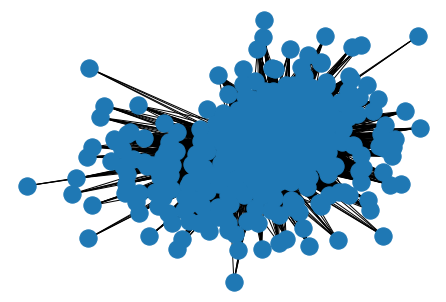

In [ ]:
path = "/jash/My Drive/Dark web analysis project/"

import networkx as nx
import matplotlib.pyplot as plt
import csv

G=nx.Graph()

with open("/jash/My Drive/Dark web analysis project/akash.edgelist", 'r') as file:
    reader = csv.reader(file)
    for num,row in enumerate(reader):
        if num == 0:
          pass
        else:
          print(row)
          a,b = (row[0].split())
          #a = a[1:]
          #b = b[:len(b)-1]
          print("a" , a)
          a = int(a)
          print("b", b)
          b = int(b)
          #input()
          try:
            G.add_node(a)
          except:
            pass
          
          try:
            G.add_node(b)
          except:
            pass

          try:
            G.add_edge(a,b)
          except:
            pass
file.close()
nx.draw(G)
plt.savefig(path + "edgeview.png", format="PNG")
plt.show()

In [ ]:
options = {
    'node_color': 'blue',
    'node_size': 1,
}

nx.draw(G, **options)
#plt.figure(figsize = (2000,2000))

plt.savefig(path + "edgeview_full.png", dpi = 1000)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np

cols = []
for i in range(128):
  cols.append("Feature" + str(i+1))

df1 = pd.DataFrame(columns = cols)
with open(path + "embs.txt") as f:
  for num,line in enumerate(f):
    if num == 0:
      pass
    else:
      lis = np.array(line.split(), dtype = float)
      lis = lis[1:]
      df1.loc[len(df1)] = lis
      #input()

df1.head()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Feature13,Feature14,Feature15,Feature16,Feature17,Feature18,Feature19,Feature20,Feature21,Feature22,Feature23,Feature24,Feature25,Feature26,Feature27,Feature28,Feature29,Feature30,Feature31,Feature32,Feature33,Feature34,Feature35,Feature36,Feature37,Feature38,Feature39,Feature40,...,Feature89,Feature90,Feature91,Feature92,Feature93,Feature94,Feature95,Feature96,Feature97,Feature98,Feature99,Feature100,Feature101,Feature102,Feature103,Feature104,Feature105,Feature106,Feature107,Feature108,Feature109,Feature110,Feature111,Feature112,Feature113,Feature114,Feature115,Feature116,Feature117,Feature118,Feature119,Feature120,Feature121,Feature122,Feature123,Feature124,Feature125,Feature126,Feature127,Feature128
0,0.080242,-0.059331,0.096671,-0.031127,0.046779,0.007938,-0.113166,-0.120005,0.057885,-0.013690,-0.025592,0.080918,0.007376,0.088039,-0.209895,0.037371,0.072963,0.134368,0.068896,-0.009541,-0.011759,0.101072,-0.035152,-0.086887,-0.010771,0.209020,0.124077,-0.071173,-0.099227,0.127401,-0.152975,0.082121,-0.073946,-0.066106,0.346735,0.122353,0.015665,-0.178444,0.001249,-0.008959,...,0.012694,-0.101068,0.084617,0.080082,-0.009096,-0.024830,-0.032449,0.112638,-0.005300,-0.151414,0.077173,0.072220,0.073975,-0.111436,-0.038831,0.052674,0.006811,-0.058740,-0.142746,0.122870,0.015686,0.127789,0.071382,-0.052538,-0.021212,0.019244,0.019262,0.091929,0.130253,-0.163161,-0.063800,0.070672,-0.130074,-0.082151,0.155187,0.001884,-0.091667,-0.152143,-0.134941,-0.042363
1,0.068687,-0.051193,0.105408,-0.017428,0.039792,0.022571,-0.115391,-0.128429,0.051001,0.002504,-0.030177,0.083235,0.012514,0.067132,-0.217601,0.058179,0.074499,0.130072,0.063220,-0.003865,-0.020251,0.097505,-0.030740,-0.100043,-0.015822,0.193860,0.120867,-0.048036,-0.076155,0.128785,-0.133775,0.066764,-0.076952,-0.070984,0.340157,0.144566,0.001278,-0.177820,-0.023744,0.001164,...,0.012075,-0.091125,0.088104,0.087221,-0.012693,-0.011111,-0.044289,0.087767,-0.004045,-0.162350,0.072014,0.040699,0.063703,-0.104043,-0.029086,0.047086,0.008936,-0.063500,-0.148319,0.118814,0.016566,0.143216,0.078157,-0.054726,-0.014100,-0.004907,0.036629,0.072504,0.131934,-0.173355,-0.085199,0.057824,-0.137753,-0.072099,0.137931,0.007504,-0.085611,-0.161886,-0.119576,-0.060791
2,0.079036,-0.037364,0.087290,0.013050,0.041923,0.011610,-0.118645,-0.108954,0.046408,0.008742,-0.031417,0.053033,0.039160,0.078399,-0.204312,0.038815,0.075528,0.112180,0.070230,-0.009113,-0.002505,0.077099,-0.031659,-0.084500,-0.020930,0.171257,0.098144,-0.031112,-0.067105,0.138195,-0.117346,0.048325,-0.073567,-0.068471,0.317323,0.106351,-0.006118,-0.161021,-0.043354,0.004086,...,0.015142,-0.078999,0.080499,0.088748,0.015022,-0.004378,-0.072243,0.084984,-0.021850,-0.186474,0.078428,0.038591,0.057486,-0.124369,-0.014032,0.045537,-0.014515,-0.077720,-0.171974,0.123547,0.023918,0.136151,0.088511,-0.041520,-0.016370,-0.010056,0.016356,0.095956,0.120722,-0.162942,-0.070043,0.076024,-0.170809,-0.053957,0.142315,0.018493,-0.082570,-0.160319,-0.111720,-0.088621
3,0.074459,-0.046832,0.093025,0.009599,0.031499,0.019286,-0.113887,-0.121145,0.049229,0.029654,-0.025269,0.060283,0.035923,0.070388,-0.213861,0.048132,0.081002,0.118998,0.081206,-0.015293,-0.010642,0.091564,-0.022172,-0.097966,-0.019457,0.165856,0.099529,-0.042335,-0.079670,0.137440,-0.140057,0.053162,-0.064779,-0.069667,0.313202,0.108350,0.001521,-0.158168,-0.040325,0.004671,...,0.022799,-0.078094,0.077592,0.078681,0.009322,-0.025237,-0.075531,0.101503,-0.018394,-0.177009,0.075641,0.036898,0.058561,-0.117178,-0.025229,0.032323,-0.004939,-0.062590,-0.160819,0.130676,0.023848,0.139353,0.100321,-0.032013,-0.020478,-0.015424,0.026807,0.082604,0.122485,-0.158254,-0.065942,0.074512,-0.149205,-0.056183,0.136457,0.014634,-0.094783,-0.149834,-0.111134,-0.078904
4,0.061944,-0.041419,0.104577,0.015947,0.034826,0.022171,-0.115709,-0.099322,0.045250,0.024006,-0.036987,0.063878,0.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df1)


In [ ]:
principal_Df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

principal_Df.head()

,principal component 1,principal component 2
0,0.233405,-0.004898
1,0.208466,0.031600
2,0.125823,0.113831
3,0.122819,0.086383
4,0.128062,0.138523


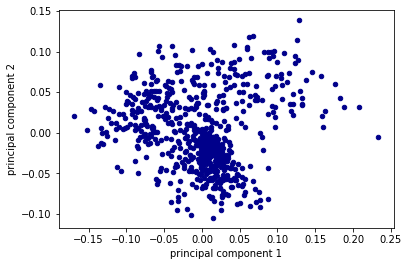

In [ ]:
x1 = principal_Df.plot.scatter(x='principal component 1',
                      y='principal component 2',
                      c='DarkBlue')

In [ ]:
del g